## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[16, 23, 41],
       [ 3,  7, 31],
       [39, 42, 80],
       [22, 53, 88],
       [ 2, 55, 76],
       [24, 54, 70]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([16, 23, 41]), array([ 3,  7, 31]))

The lowest card in the game is

In [5]:
np.min(cards)

2

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [6]:
n_resamples = 1000
min_card = np.zeros(n_resamples-1)
for i in np.arange(0, n_resamples-1, 1):
    cards = sample_cards(100, 6, 3)
    min_card[i] = int(np.min(cards))

Text(0, 0.5, 'Frequency')

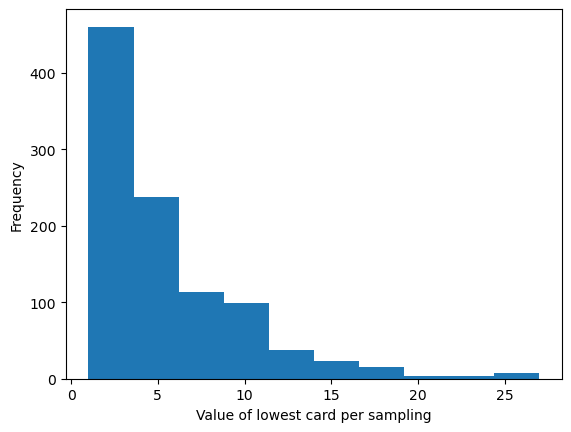

In [7]:
## Plot:
plt.hist(min_card, bins=10);
plt.xlabel("Value of lowest card per sampling")
plt.ylabel("Frequency")

### 2. What is the distribution of the largest gap?

For each simulation, find the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [8]:
n_resamples = 1000
max_gap = np.zeros(n_resamples)

## For each resampling:
for i in np.arange(0, n_resamples, 1):
    cards = sample_cards(100, 6, 3)
    cards = cards.reshape(6*3)
    ## Get maximum gap between consecutive cards:
    cards = np.sort(cards)
    gaps = [cards[i + 1] - cards[i] for i in range(len(cards)-1)]
    max_gap[i] = max(gaps)

Mean: 16.997


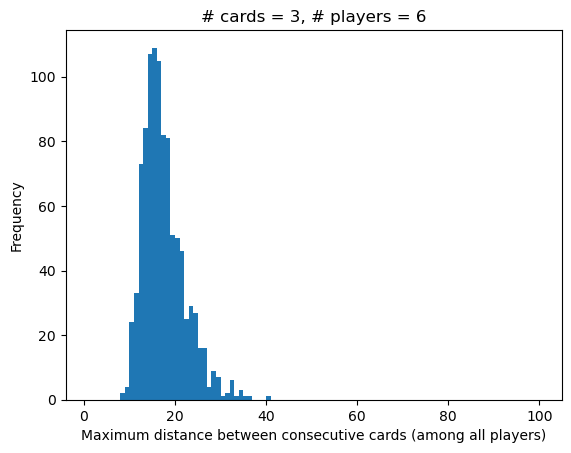

In [9]:
## Plot:
plt.hist(max_gap, bins=np.arange(1, 101));
plt.title('# cards = '+ str(3) + ', # players = ' + str(6))
plt.xlabel("Maximum distance between consecutive cards (among all players)");
plt.ylabel("Frequency");
print("Mean:", np.mean(max_gap))

Repeat the experiment but now compute the largest gap between cards of *different* players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [10]:
def max_gap_diff_players(n_players, n_cards):
    ## Deal cards:
    cards = sample_cards(100, n_players, n_cards)
    ## Create array of player indices:
    player_inds = np.tile(np.arange(1, n_players+1).reshape(n_players, 1), (1, n_cards))
    player_inds = player_inds.flatten()
    ## Flatten list of cards
    all_cards = np.reshape(cards, n_cards*n_players)
    ## Get order indices of cards
    inds = np.argsort(all_cards)
    ## Sort cards by card indices
    sorted_cards = all_cards[inds]
    ## Sort players by card indices
    player_inds = player_inds[inds]
    ## Get diff. between consec. cards:
    card_diffs = np.diff(sorted_cards)
    ## Identify which entries correspond to the same player, and remove:
    ind_diffs = np.diff(player_inds)
    is_same_player = np.where(ind_diffs==0)
    card_diffs = np.delete(card_diffs, is_same_player)
    return(np.max(card_diffs))

Mean: 15.23


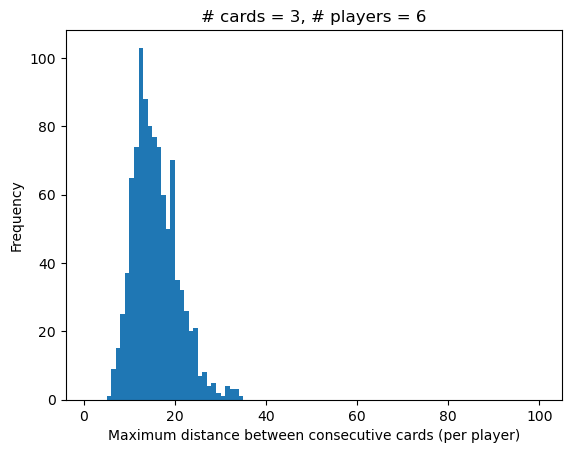

In [11]:
## Plot:
n_cards = 3
n_players = 6
n_resamples = 1000

max_gap = []
for i in range(1000):
    max_gap.append(max_gap_diff_players(n_cards, n_players))

plt.hist(max_gap, bins=np.arange(1, 101));
plt.title('# cards = '+ str(n_cards) + ', # players = ' + str(n_players))
plt.xlabel("Maximum distance between consecutive cards (per player)");
plt.ylabel("Frequency");
print("Mean:", np.mean(max_gap))

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

### Vary number of cards:

Difference: 12.501000000000001


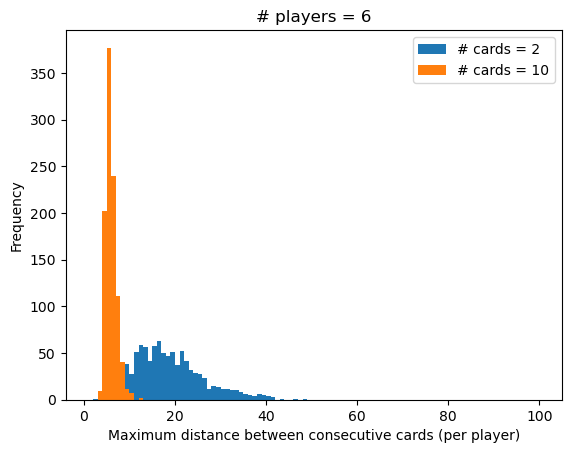

In [12]:
n_players = 6
n_resamples = 1000

n_cards = 2
max_gap_2 = []
for i in range(1000):
    max_gap_2.append(max_gap_diff_players(n_cards, n_players))

n_cards = 10
max_gap_10 = []
for i in range(1000):
    max_gap_10.append(max_gap_diff_players(n_cards, n_players))

plt.hist(max_gap_2, bins=np.arange(1, 101));
plt.hist(max_gap_10, bins=np.arange(1, 101));

str1 = '# cards = 2'
str4 = '# cards = 10'
plt.title("# players = " + str(n_players))
plt.legend([str1, str4], ncol=1) 
plt.xlabel("Maximum distance between consecutive cards (per player)")
plt.ylabel("Frequency")

print("Difference:", np.mean(max_gap_2) - np.mean(max_gap_10))

### Vary number of players:

Difference: 19.102


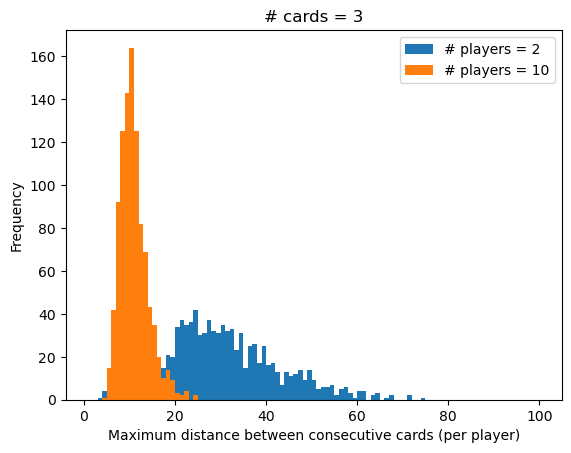

In [13]:
n_cards = 3
n_resamples = 1000

n_players = 2
max_gap_2 = []
for i in range(1000):
    max_gap_2.append(max_gap_diff_players(n_cards, n_players))

n_players = 10
max_gap_10 = []
for i in range(1000):
    max_gap_10.append(max_gap_diff_players(n_cards, n_players))

plt.hist(max_gap_2, bins=np.arange(1, 101));
plt.hist(max_gap_10, bins=np.arange(1, 101));

str1 = '# players = 2'
str4 = '# players = 10'
plt.title("# cards = " + str(n_cards))
plt.legend([str1, str4], ncol=1) 
plt.xlabel("Maximum distance between consecutive cards (per player)")
plt.ylabel("Frequency")

print("Difference:", np.mean(max_gap_2) - np.mean(max_gap_10))

The difference between the means of the distributions with 2 cards vs. 10 cards is < than the difference between the means of the distributions with 2 players vs. 4 players. This suggests that **the maximum difference between cards is more dependent on number of players vs. the number of cards per players**.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

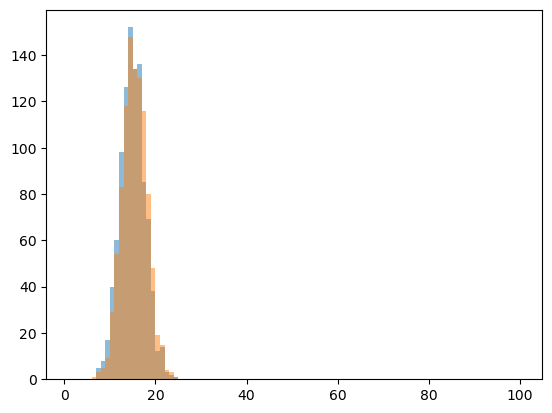

In [14]:
## Define success as: card x1 from player n1 < card x2 from player n2
n_resamples = 1000
n_players = 10
n_cards = 3
player_n = np.arange(n_players)
card_n = np.arange(n_cards)
    
n_success = []
for i in np.arange(n_resamples):
    cards = sample_cards(100, n_players, n_cards)
    outcomes = []
    for j in range(n_players*n_cards):
        ## Ask: is card x1 from player n1 < card x2 from player n2?
        player1, card1 = np.random.choice(player_n), np.random.choice(card_n)
        player2, card2 = np.random.choice(player_n), np.random.choice(card_n)
        outcomes.append(cards[player1, card1] < cards[player2, card2])
    n_success.append(sum(outcomes))


## Compare to binomial distirbution
exp_success = np.random.binomial(n=n_players*n_cards, p=.5, size=n_resamples)

plt.hist(n_success, bins=np.arange(1, 101), alpha=.5);
plt.hist(exp_success, bins=np.arange(1, 101), alpha=.5);

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

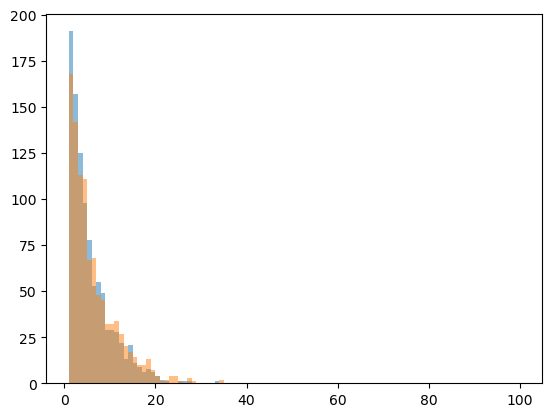

In [15]:
n_resamples = 1000
n_total_cards = 100
n_players = 6
n_cards = 3

## Min. card distribution:
min_card = np.zeros(n_resamples-1)
for i in np.arange(0, n_resamples-1, 1):
    cards = sample_cards(n_total_cards, 6, 3)
    min_card[i] = int(np.min(cards))

## Compare to beta distribution:
a = 1
n = n_cards * n_players
b = n + 1 - a
outcomes = np.zeros(n_resamples)
for i in np.arange(n_resamples):
     outcomes[i] = np.random.beta(a, b) * 100

## Plot:
plt.hist(min_card, bins=np.arange(1, 101), alpha=.5);
plt.hist(outcomes+1, bins=np.arange(1, 101), alpha=.5);

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

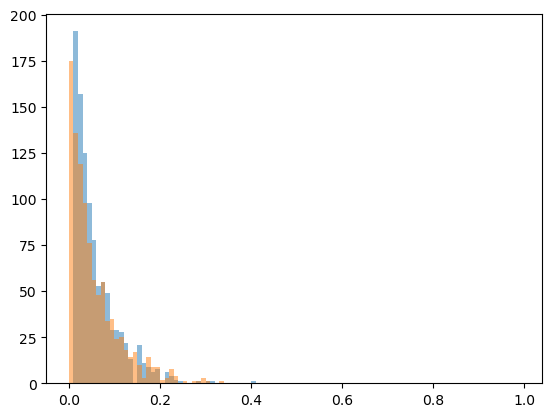

In [16]:
from scipy.stats import expon

n_resamples = 1000

## Transform min. card distro:
n_total_cards = 100
X = -np.log(1 - min_card / n_total_cards)

## Compare to exponential distribution:
a = 1
n = n_cards * n_players
exp = np.random.exponential(a/n, n_resamples)

## Plot:
plt.hist(X, bins=np.arange(0, 1, .01), alpha=.5);
plt.hist(exp, bins=np.arange(0, 1, .01), alpha=.5);

### 4. What happens when $n * k << N$?

Some of the distributions we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When will the difference between the two sampling strategies lead to similar or different results?

In [73]:
def sample_cards(N, n, k, repl):
    assert n * k <= N, "There are not enough cards for all the players!"
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=repl)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Text(0.5, 0.98, 'With resampling')

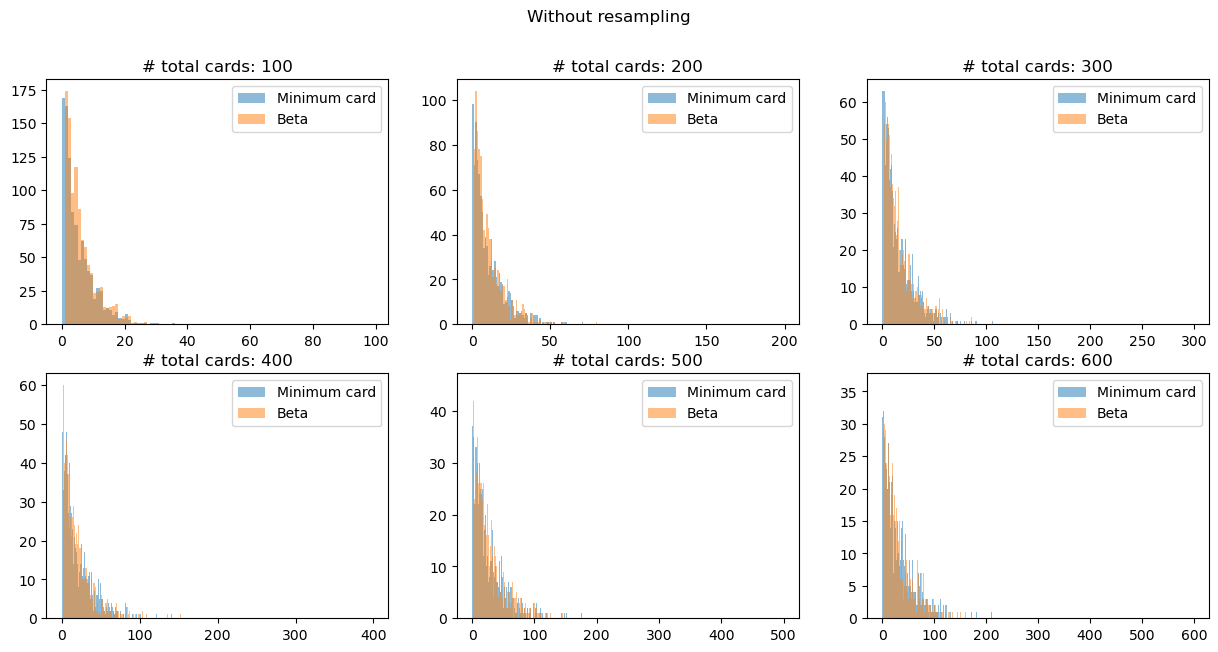

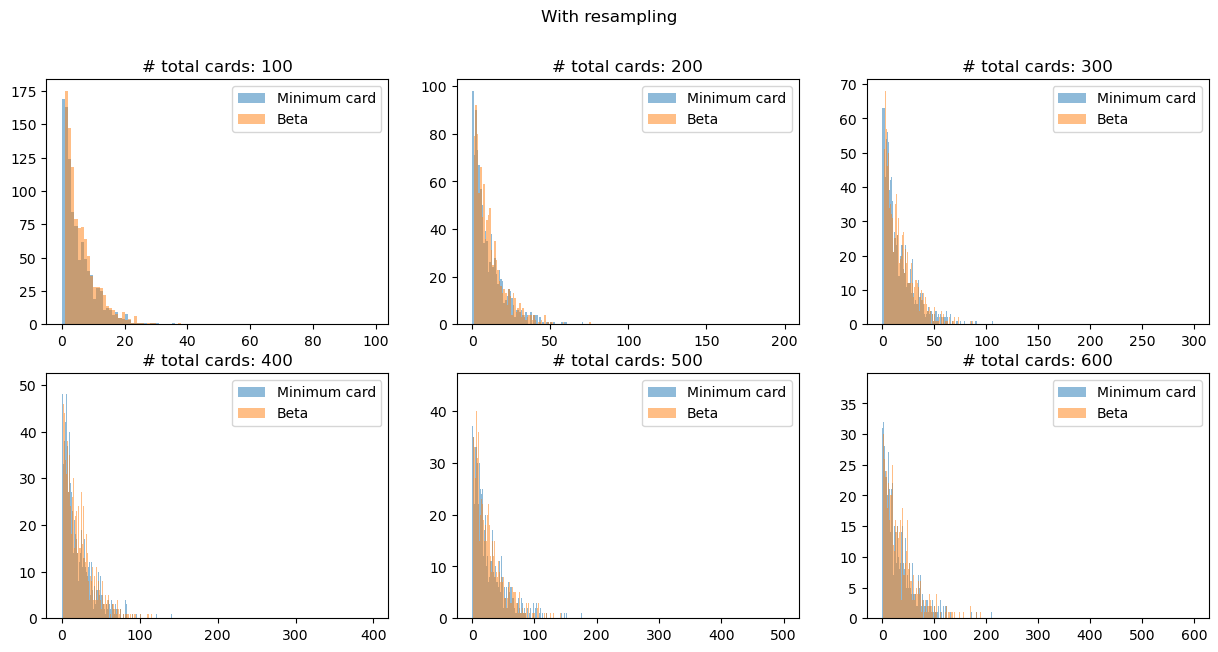

In [74]:
## Beta distribution

n_players = 6
n_cards = 3
a = 1
n = n_cards * n_players
b = n + 1 - a
beta = np.random.beta(a, b, 1000)

## Replace = F
repl = False
plt.figure(figsize=(15, 7))
for n_total_cards in range(100, 601, 100):
    plt.subplot(2, 3, n_total_cards//100)
    ## Min. card distribution:
    min_card = []
    for i in np.arange(0, n_resamples-1, 1):
        min_card.append(int(np.min(sample_cards(n_total_cards, n_players, n_cards, repl))))
    plt.hist(beta*n_total_cards, np.arange(n_total_cards), alpha=.5);
    plt.hist(min_card, np.arange(n_total_cards), alpha=0.5);
    plt.title("# total cards: " + str(n_total_cards));
    plt.legend(["Minimum card", "Beta"], ncol=1);
plt.suptitle("Without resampling")

## Replace = T
repl = True
plt.figure(figsize=(15, 7))
for n_total_cards in range(100, 601, 100):
    plt.subplot(2, 3, n_total_cards//100)
    ## Min. card distribution:
    min_card = []
    for i in np.arange(0, n_resamples-1, 1):
        min_card.append(int(np.min(sample_cards(n_total_cards, n_players, n_cards, repl))))
    plt.hist(beta*n_total_cards, np.arange(n_total_cards), alpha=.5);
    plt.hist(min_card, np.arange(n_total_cards), alpha=0.5);
    plt.title("# total cards: " + str(n_total_cards));
    plt.legend(["Minimum card", "Beta"], ncol=1);
plt.suptitle("With resampling")

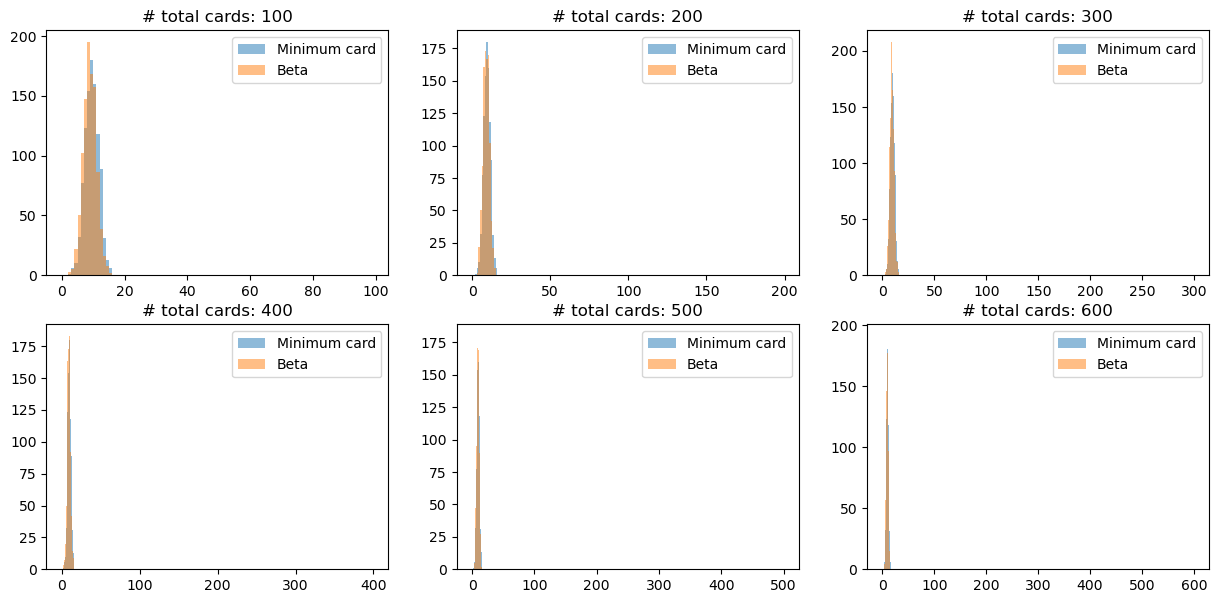

In [71]:
## Binomial distribution

n_players = 6
n_cards = 3
n_resamples = 1000
player_n = np.arange(n_players)
card_n = np.arange(n_cards)

binom = np.random.binomial(n=n_players*n_cards, p=.5, size=n_resamples)

## Replace = F
repl = False
plt.figure(figsize=(15, 7))
for n_total_cards in range(100, 601, 100):
    plt.subplot(2, 3, n_total_cards//100)
    ## Max gap distribution:
    n_success = []
    for i in np.arange(n_resamples):
        cards = sample_cards(100, n_players, n_cards, repl)
        outcomes = []
        for j in range(n_players*n_cards):
            ## Ask: is card x1 from player n1 < card x2 from player n2?
            player1, card1 = np.random.choice(player_n), np.random.choice(card_n)
            player2, card2 = np.random.choice(player_n), np.random.choice(card_n)
            outcomes.append(cards[player1, card1] < cards[player2, card2])
        n_success.append(sum(outcomes))
    plt.hist(binom, np.arange(n_total_cards), alpha=.5);
    plt.hist(n_success, np.arange(n_total_cards), alpha=0.5);
    plt.title("# total cards: " + str(n_total_cards));
    plt.legend(["Max card gap", "Binomial"], ncol=1);
plt.suptitle("Without resampling")

## Replace = T
repl = True
plt.figure(figsize=(15, 7))
for n_total_cards in range(100, 601, 100):
    plt.subplot(2, 3, n_total_cards//100)
    ## Max gap distribution:
    n_success = []
    for i in np.arange(n_resamples):
        cards = sample_cards(100, n_players, n_cards, repl)
        outcomes = []
        for j in range(n_players*n_cards):
            ## Ask: is card x1 from player n1 < card x2 from player n2?
            player1, card1 = np.random.choice(player_n), np.random.choice(card_n)
            player2, card2 = np.random.choice(player_n), np.random.choice(card_n)
            outcomes.append(cards[player1, card1] < cards[player2, card2])
        n_success.append(sum(outcomes))
    plt.hist(binom, np.arange(n_total_cards), alpha=.5);
    plt.hist(n_success, np.arange(n_total_cards), alpha=0.5);
    plt.title("# total cards: " + str(n_total_cards));
    plt.legend(["Max card gap", "Binomial"], ncol=1);
plt.suptitle("With resampling")

As N (the total number of cards) increases, the more the empirical distribution resembles the theoretical distribution.

Because N is large to begin with, the choice of resampling vs. no resampling has little impact.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 

- Member No1: Kithmini Herath (@KithminiHerath)
- Member No2: Jules Perez (@jpere104)
- Member No3: Daniel Lewinsohn (@Lewinsohndp)